#Sentimental Analysis Project
## Dataset : Musical_instruments_reviews from Amazon Review Data (2018)


##Objectives of Project


1. วิเคราะห์ความรู้สึกของลูกค้าที่มีต่อการซื้อเครื่องดนตรีบน Amazon จากข้อความ Reviews ด้วยการสร้างแบบจำลอง Sentimental Analysis ที่ใช้ในการวิเคราะห์และจำแนกอารมณ์ ความรู้สึก และความคิดเห็นจากข้อความ
2.   เพื่อเข้าใจความพึงพอใจโดยรวมของลูกค้าที่มีต่อเครื่องดนตรี สามารถค้นพบแง่มุมเฉพาะของเครื่องดนตรีแต่ละประเภทที่ลูกค้าชื่นชมจากข้อความแสดงความคิดเห็น เช่น คุณภาพเสียง ความสามารถในการเล่น ความทนทาน เป็นต้น รวมทั้งสามารถค้นพบข้อความแสดงความคิดเห็นจากลูกค้าเกิดขึ้นซ้ำจากการวิจารณ์เชิงบวกและเชิงลบ
3. เพื่อทราบความรู้สึกโดยรวม (เชิงบวก เชิงลบ เป็นกลาง) ของข้อความแสดงความคิดเห็นเครื่องดนตรีเป็นอย่างไร




##Import Libraries

In [ ]:

#Basic libraries
import pandas as pd
import numpy as np


#NLTK libraries
import nltk
nltk.download('all')
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

#1.Import dataset (Musical_instruments_reviews)
ทำการ import data 2 ส่วน ได้แก่ Reviews และ Metadata

In [ ]:
raw_reviews = pd.read_json('https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Musical_Instruments.json.gz',lines=True, nrows=15000)
## print shape of dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(15000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         15000 non-null  int64  
 1   vote            2431 non-null   float64
 2   verified        15000 non-null  bool   
 3   reviewTime      15000 non-null  object 
 4   reviewerID      15000 non-null  object 
 5   asin            15000 non-null  object 
 6   style           8738 non-null   object 
 7   reviewerName    15000 non-null  object 
 8   reviewText      14998 non-null  object 
 9   summary         14999 non-null  object 
 10  unixReviewTime  15000 non-null  int64  
 11  image           91 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 1.3+ MB
None


In [ ]:
raw_reviews.head()

overall  vote  verified   reviewTime      reviewerID        asin  \
0        5  90.0     False   08 9, 2004   AXHY24HWOF184  0470536454   
1        4   2.0      True   04 6, 2017  A29OWR79AM796H  0470536454   
2        5   NaN      True  03 14, 2017   AUPWU27A7X5F6  0470536454   
3        4   NaN      True  02 14, 2017  A1N69A47D4JO6K  0470536454   
4        5   NaN      True  01 29, 2017   AHTIQUMVCGBFJ  0470536454   

                       style         reviewerName  \
0  {'Format:': ' Paperback'}                Bendy   
1  {'Format:': ' Hardcover'}      Amazon Customer   
2  {'Format:': ' Paperback'}      Amazon Customer   
3  {'Format:': ' Paperback'}  Christopher Burnett   
4  {'Format:': ' Paperback'}      Amazon Customer   

                                          reviewText  \
0  Crocheting for Dummies by Karen Manthey & Susa...   
1                                    Very helpful...   
2        EASY TO UNDERSTAND AND A PROMPT SERVICE TOO   
3                      My girlfriend use quite often   
4                  Arrived as described. Very happy.   

                                         summary  unixReviewTime image  
0  Terrific Book for Learning the Art of Crochet      1092009600   NaN  
1                                     Four Stars      1491436800   NaN  
2                                     Five Stars      1489449600   NaN  
3                                     Four Stars      1487030400   NaN  
4                                    Very happy.      1485648000   NaN

### Dataset Details
* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* vote - helpful votes of the review
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* image - images that users post after they have received the product

In [ ]:
metadata = pd.read_json('https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Musical_Instruments.json.gz',lines = True)
## print shape of metadata with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(metadata.shape))
print (metadata.info())

The shape of the  data is (row, column):(120310, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120310 entries, 0 to 120309
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         120310 non-null  object
 1   tech1            120310 non-null  object
 2   description      120310 non-null  object
 3   fit              120310 non-null  object
 4   title            120310 non-null  object
 5   also_buy         120310 non-null  object
 6   tech2            120310 non-null  object
 7   brand            120310 non-null  object
 8   feature          120310 non-null  object
 9   rank             120310 non-null  object
 10  also_view        120310 non-null  object
 11  main_cat         120310 non-null  object
 12  similar_item     120310 non-null  object
 13  date             120310 non-null  object
 14  price            120310 non-null  object
 15  asin             120310 non-null  object
 16  ima

In [ ]:
metadata.head()

category tech1  \
0  [Musical Instruments, Drums & Percussion, Hand...         
1  [Musical Instruments, Drums & Percussion, Hand...         
2  [Musical Instruments, Instrument Accessories, ...         
3                                                 []         
4                                                 []         

                                         description fit  \
0  [Cricket Rubbing the spine with the wooden sti...       
1  [Frog - Rubbing its spine with the wooden stic...       
2  [Vivaldi's famous set of four violin concertos...       
3  [The Turn of the Screw (op. 54) vocal score, p...       
4                                                 []       

                                               title  \
0  Wooden Percussion 2 Piece Set of 3 Inch Cricke...   
1  Wooden Percussion 3 Piece Set Frog, Cricket an...   
2  Hal Leonard Vivaldi Four Seasons for Piano (Or...   
3                The Turn of the Screw (vocal score)   
4  Suite for Organ (including the Trumpet Volunta...   

                                            also_buy tech2  \
0               [B00NP8GYVS, B00NP80XMO, B00NP8M098]         
1  [B00NP8GYVS, B00NP80XMO, B01MY48HK5, B00AZZ1AJ...         
2                                                 []         
3  [0486266842, 0793507669, 0393008789, 142341280...         
4                                                 []         

                 brand                                            feature  \
0        WADSUWAN SHOP  [Wood percussion, Owl whistle*, Includes woode...   
1        WADSUWAN SHOP  [Wood percussion, Small 3 inches, Creates orig...   
2          Hal Leonard                                          [., ., .]   
3  Boosey &amp; Hawkes                                                 []   
4                                                                      []   

                                                rank also_view  \
0  [>#141,729 in Musical Instruments (See Top 100...        []   
1  [>#1,622 in Musical Instruments (See Top 100 i...        []   
2  [>#330,653 in Musical Instruments (See Top 100...        []   
3  [>#86,354 in Musical Instruments (See Top 100 ...        []   
4  [>#482,025 in Musical Instruments (See Top 100...        []   

              main_cat similar_item              date    price        asin  \
0  Musical Instruments               December 2, 2013           0000989983   
1  Musical Instruments               December 2, 2013    $0.91  0000098906   
2  Musical Instruments                   May 10, 2011   $62.93  0041291905   
3  Musical Instruments                   May 23, 2007  $107.79  0060015500   
4  Musical Instruments               February 8, 2013           0193757710   

                                            imageURL  \
0  [https://images-na.ssl-images-amazon.com/image...   
1  [https://images-na.ssl-images-amazon.com/image...   
2  [https://images-na.ssl-images-amazon.com/image...   
3  [https://images-na.ssl-images-amazon.com/image...   
4  [https://images-na.ssl-images-amazon.com/image...   

                                     imageURLHighRes details  
0  [https://images-na.ssl-images-amazon.com/image...     NaN  
1  [https://images-na.ssl-images-amazon.com/image...     NaN  
2  [https://images-na.ssl-images-amazon.com/image...     NaN  
3  [https://images-na.ssl-images-amazon.com/image...     NaN  
4  [https://images-na.ssl-images-amazon.com/image...     NaN

### Metadata Details



*   asin - ID of the product, e.g. 0000031852
*   title - name of the product
*   feature - bullet-point format features of the product
*   fdescription - description of the product
*   price - price in US dollars (at time of crawl)
*   imageURL - url of the product image
*   imageURL - url of the high resolution product image
*   related - related products (also bought, also viewed, bought together, buy *   after viewing)
*   salesRank - sales rank information
*   brand - brand name
*   categories - list of categories the product belongs to
*   tech1 - the first technical detail table of the product
*   tech2 - the second technical detail table of the product

#2.Preprocessing and cleaning Data

In [ ]:
#Creating a copy
df_reviews=raw_reviews.copy()

#Checking for null values
df_reviews.isnull().sum()

overall               0
vote              12569
verified              0
reviewTime            0
reviewerID            0
asin                  0
style              6262
reviewerName          0
reviewText            2
summary               1
unixReviewTime        0
image             14909
dtype: int64

*พบค่าว่างในคอลัมน์* vote, style  และคอลัมน์ image

In [ ]:
#Creating a copy
df_metadata=metadata.copy()

#Checking for null values
df_metadata.isnull().sum()

category             0
tech1                0
description          0
fit                  0
title                0
also_buy             0
tech2                0
brand                0
feature              0
rank                 0
also_view            0
main_cat             0
similar_item         0
date                 0
price                0
asin                 0
imageURL             0
imageURLHighRes      0
details            116
dtype: int64

พบค่าว่างในคอลัมน์ detals

3.1 Preprocessing and cleaning Data ในส่วนของ Metadata


*  ทำการลบข้อลัมน์ที่ไม่ได้นำมาวิเคราะห์




In [ ]:
music_meta = df_metadata[['asin','description','category','title','price','rank','brand']]
music_meta.head()

asin                                        description  \
0  0000989983  [Cricket Rubbing the spine with the wooden sti...   
1  0000098906  [Frog - Rubbing its spine with the wooden stic...   
2  0041291905  [Vivaldi's famous set of four violin concertos...   
3  0060015500  [The Turn of the Screw (op. 54) vocal score, p...   
4  0193757710                                                 []   

                                            category  \
0  [Musical Instruments, Drums & Percussion, Hand...   
1  [Musical Instruments, Drums & Percussion, Hand...   
2  [Musical Instruments, Instrument Accessories, ...   
3                                                 []   
4                                                 []   

                                               title    price  \
0  Wooden Percussion 2 Piece Set of 3 Inch Cricke...            
1  Wooden Percussion 3 Piece Set Frog, Cricket an...    $0.91   
2  Hal Leonard Vivaldi Four Seasons for Piano (Or...   $62.93   
3                The Turn of the Screw (vocal score)  $107.79   
4  Suite for Organ (including the Trumpet Volunta...            

                                                rank                brand  
0  [>#141,729 in Musical Instruments (See Top 100...        WADSUWAN SHOP  
1  [>#1,622 in Musical Instruments (See Top 100 i...        WADSUWAN SHOP  
2  [>#330,653 in Musical Instruments (See Top 100...          Hal Leonard  
3  [>#86,354 in Musical Instruments (See Top 100 ...  Boosey &amp; Hawkes  
4  [>#482,025 in Musical Instruments (See Top 100...

3.1 Preprocessing and cleaning Data ในส่วนของ Musical_instruments_reviews

ทำการรวมคอลัมน์ review text และ คอลัมน์ summary เข้าด้วยกัน เนื่องจากเป็นข้อมความรีวิวเหมือนกัน

In [ ]:
df_reviews['reviews']=df_reviews['reviewText']+df_reviews['summary']
df_reviews=df_reviews.drop(['reviewText', 'summary'], axis=1)
df_reviews.head()

overall  vote  verified   reviewTime      reviewerID        asin  \
0        5  90.0     False   08 9, 2004   AXHY24HWOF184  0470536454   
1        4   2.0      True   04 6, 2017  A29OWR79AM796H  0470536454   
2        5   NaN      True  03 14, 2017   AUPWU27A7X5F6  0470536454   
3        4   NaN      True  02 14, 2017  A1N69A47D4JO6K  0470536454   
4        5   NaN      True  01 29, 2017   AHTIQUMVCGBFJ  0470536454   

                       style         reviewerName  unixReviewTime image  \
0  {'Format:': ' Paperback'}                Bendy      1092009600   NaN   
1  {'Format:': ' Hardcover'}      Amazon Customer      1491436800   NaN   
2  {'Format:': ' Paperback'}      Amazon Customer      1489449600   NaN   
3  {'Format:': ' Paperback'}  Christopher Burnett      1487030400   NaN   
4  {'Format:': ' Paperback'}      Amazon Customer      1485648000   NaN   

                                             reviews  
0  Crocheting for Dummies by Karen Manthey & Susa...  
1                          Very helpful...Four Stars  
2  EASY TO UNDERSTAND AND A PROMPT SERVICE TOOFiv...  
3            My girlfriend use quite oftenFour Stars  
4       Arrived as described. Very happy.Very happy.

ทำการเลือกคอลัมน์ที่ต้องการวิเคราะห์ โดยตัดคอลัมน์ Vote style และ image ออกเนื่องจากมีค่า nan จำนวนมาก และคิดว่าไม่ส่งผลต่อการวิเคราะห์

In [ ]:
df_reviews = df_reviews[['reviewerID','asin','reviewerName','verified','overall','unixReviewTime','reviewTime','reviews']]

In [ ]:
df_reviews.head()

reviewerID        asin         reviewerName  verified  overall  \
0   AXHY24HWOF184  0470536454                Bendy     False        5   
1  A29OWR79AM796H  0470536454      Amazon Customer      True        4   
2   AUPWU27A7X5F6  0470536454      Amazon Customer      True        5   
3  A1N69A47D4JO6K  0470536454  Christopher Burnett      True        4   
4   AHTIQUMVCGBFJ  0470536454      Amazon Customer      True        5   

   unixReviewTime   reviewTime  \
0      1092009600   08 9, 2004   
1      1491436800   04 6, 2017   
2      1489449600  03 14, 2017   
3      1487030400  02 14, 2017   
4      1485648000  01 29, 2017   

                                             reviews  
0  Crocheting for Dummies by Karen Manthey & Susa...  
1                          Very helpful...Four Stars  
2  EASY TO UNDERSTAND AND A PROMPT SERVICE TOOFiv...  
3            My girlfriend use quite oftenFour Stars  
4       Arrived as described. Very happy.Very happy.

พิจารณาจากคะแนน column overall
หากคะแนนมากกว่า 3 เราจะถือว่าสิ่งนั้นเป็นบวก และหากค่าน้อยกว่า 3 จะเป็นลบ

*   คะแนนมากกว่า 3 จะถือว่าเป็นบวก
*   คะแนนเท่ากับ 3 จะถือว่าเป็นกลาง
*   คะแนนน้อยกว่า 3 จะถือว่าจะเป็นลบ  


In [ ]:
df_reviews['overall'].value_counts()

overall
5    9523
4    2398
1    1346
3    1049
2     684
Name: count, dtype: int64

In [ ]:
def f(row):

    '''This function returns sentiment value based on the overall ratings from the user'''

    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
df_reviews['sentiment'] = df_reviews.apply(f, axis=1)
df_reviews.head()

reviewerID        asin         reviewerName  verified  overall  \
0   AXHY24HWOF184  0470536454                Bendy     False        5   
1  A29OWR79AM796H  0470536454      Amazon Customer      True        4   
2   AUPWU27A7X5F6  0470536454      Amazon Customer      True        5   
3  A1N69A47D4JO6K  0470536454  Christopher Burnett      True        4   
4   AHTIQUMVCGBFJ  0470536454      Amazon Customer      True        5   

   unixReviewTime   reviewTime  \
0      1092009600   08 9, 2004   
1      1491436800   04 6, 2017   
2      1489449600  03 14, 2017   
3      1487030400  02 14, 2017   
4      1485648000  01 29, 2017   

                                             reviews sentiment  
0  Crocheting for Dummies by Karen Manthey & Susa...  Positive  
1                          Very helpful...Four Stars  Positive  
2  EASY TO UNDERSTAND AND A PROMPT SERVICE TOOFiv...  Positive  
3            My girlfriend use quite oftenFour Stars  Positive  
4       Arrived as described. Very happy.Very happy.  Positive

In [ ]:
df_reviews['sentiment'].value_counts()

sentiment
Positive    11921
Negative     2030
Neutral      1049
Name: count, dtype: int64

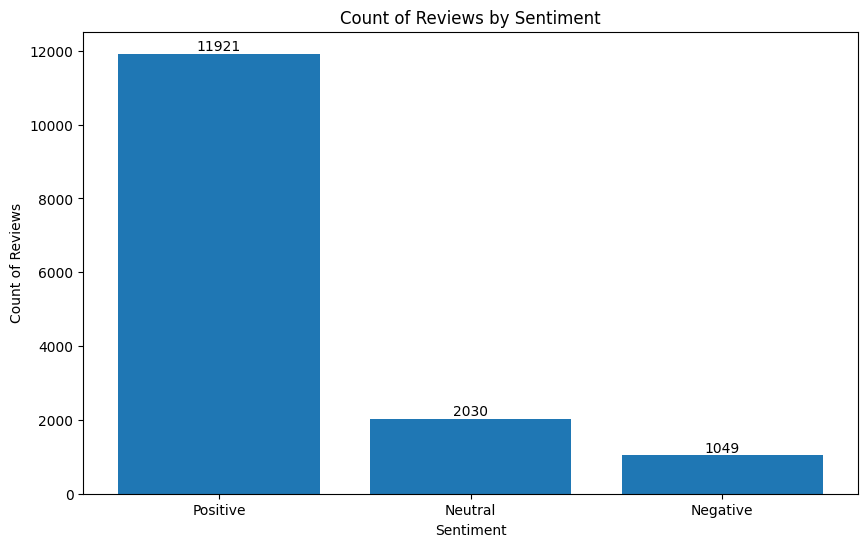

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(df_reviews['sentiment'].unique(), df_reviews['sentiment'].value_counts())
plt.xlabel("Sentiment")
plt.ylabel("Count of Reviews")
plt.title("Count of Reviews by Sentiment")
for i in range(len(df_reviews['sentiment'].unique())):
    plt.text(i, df_reviews['sentiment'].value_counts()[i], df_reviews['sentiment'].value_counts()[i], ha='center', va='bottom')
plt.show()


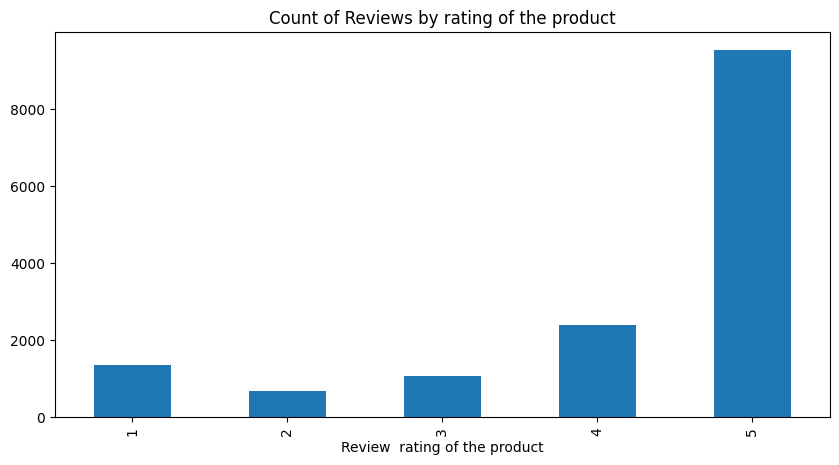

In [ ]:
ax = df_reviews['overall'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by rating of the product',
          figsize=(10, 5))
ax.set_xlabel('Review  rating of the product')
plt.show()

ทำการแยกวันเดือนปี ออกจากกัน

In [ ]:
# new data frame which has date and year
new = df_reviews["reviewTime"].str.split(",", n = 1, expand = True)

# making separate date column from new data frame
df_reviews["date"]= new[0]

# making separate year column from new data frame
df_reviews["year"]= new[1]

df_reviews=df_reviews.drop(['reviewTime'], axis=1)
df_reviews.head()

reviewerID        asin         reviewerName  verified  overall  \
0   AXHY24HWOF184  0470536454                Bendy     False        5   
1  A29OWR79AM796H  0470536454      Amazon Customer      True        4   
2   AUPWU27A7X5F6  0470536454      Amazon Customer      True        5   
3  A1N69A47D4JO6K  0470536454  Christopher Burnett      True        4   
4   AHTIQUMVCGBFJ  0470536454      Amazon Customer      True        5   

   unixReviewTime                                            reviews  \
0      1092009600  Crocheting for Dummies by Karen Manthey & Susa...   
1      1491436800                          Very helpful...Four Stars   
2      1489449600  EASY TO UNDERSTAND AND A PROMPT SERVICE TOOFiv...   
3      1487030400            My girlfriend use quite oftenFour Stars   
4      1485648000       Arrived as described. Very happy.Very happy.   

  sentiment   date   year  
0  Positive   08 9   2004  
1  Positive   04 6   2017  
2  Positive  03 14   2017  
3  Positive  02 14   2017  
4  Positive  01 29   2017

In [ ]:
# Splitting the date
new2 = df_reviews["date"].str.split(" ", n = 1, expand = True)

# adding month to the main dataset
df_reviews["month"]= new2[0]

# adding day to the main dataset
df_reviews["day"]= new2[1]

df_reviews=df_reviews.drop(['date'], axis=1)
df_reviews.head()

reviewerID        asin         reviewerName  verified  overall  \
0   AXHY24HWOF184  0470536454                Bendy     False        5   
1  A29OWR79AM796H  0470536454      Amazon Customer      True        4   
2   AUPWU27A7X5F6  0470536454      Amazon Customer      True        5   
3  A1N69A47D4JO6K  0470536454  Christopher Burnett      True        4   
4   AHTIQUMVCGBFJ  0470536454      Amazon Customer      True        5   

   unixReviewTime                                            reviews  \
0      1092009600  Crocheting for Dummies by Karen Manthey & Susa...   
1      1491436800                          Very helpful...Four Stars   
2      1489449600  EASY TO UNDERSTAND AND A PROMPT SERVICE TOOFiv...   
3      1487030400            My girlfriend use quite oftenFour Stars   
4      1485648000       Arrived as described. Very happy.Very happy.   

  sentiment   year month day  
0  Positive   2004    08   9  
1  Positive   2017    04   6  
2  Positive   2017    03  14  
3  Positive   2017    02  14  
4  Positive   2017    01  29

**ทำการลบเครื่องหมาย และURL ในคอลัมน์ reviews**

In [ ]:
#Removing unnecessary columns
df_reviews=df_reviews.drop(['reviewerName','unixReviewTime'], axis=1)
#Creating a copy
clean_reviews=df_reviews.copy()

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_reviews['reviews']=df_reviews['reviews'].apply(lambda x:review_cleaning(x))
df_reviews.head()

reviewerID        asin  verified  overall  \
0   AXHY24HWOF184  0470536454     False        5   
1  A29OWR79AM796H  0470536454      True        4   
2   AUPWU27A7X5F6  0470536454      True        5   
3  A1N69A47D4JO6K  0470536454      True        4   
4   AHTIQUMVCGBFJ  0470536454      True        5   

                                             reviews sentiment   year month  \
0  crocheting for dummies by karen manthey  susan...  Positive   2004    08   
1                             very helpfulfour stars  Positive   2017    04   
2  easy to understand and a prompt service toofiv...  Positive   2017    03   
3            my girlfriend use quite oftenfour stars  Positive   2017    02   
4          arrived as described very happyvery happy  Positive   2017    01   

  day  
0   9  
1   6  
2  14  
3  14  
4  29

ทำการลบ Stop words ใน reviews

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

#Removing special characters
def remove_special_character(content):
    return re.sub('\W+', ' ', content)

# Removing stopwords from text
def remove_stopwords(content):
    clean_data = []
    for word in content.split():
        if word.strip().lower() not in stop_words and word.strip().lower().isalpha():
            clean_data.append(word.strip().lower())
    return " ".join(clean_data)

# Expansion of English contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content

# Stemming words
def stem_words(content):
    stemmed_words = []
    for word in content.split():
        stemmed_words.append(stemmer.stem(word))
    return " ".join(stemmed_words)

# Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_stopwords(content)
    content = stem_words(content)
    return content


In [ ]:
df_reviews['reviews'].apply(data_cleaning)

0        crochet dummi karen manthey susan brittain won...
1                                         helpfulfour star
2                easi understand prompt servic toofiv star
3                       girlfriend use quit oftenfour star
4                            arriv describ happyveri happi
                               ...                        
14995                     alway great perform micsfiv star
14996    love microphon come box felt good hand sound a...
14997                       good qualiti best songfiv star
14998    purchas five microphon imagin surpris disappoi...
14999    great around microphon switch could sturdyfour...
Name: reviews, Length: 15000, dtype: object

In [ ]:
#Data cleaning
df_reviews['reviews']=df_reviews['reviews'].apply(data_cleaning)
df_reviews.head(5)

reviewerID        asin  verified  overall  \
0   AXHY24HWOF184  0470536454     False        5   
1  A29OWR79AM796H  0470536454      True        4   
2   AUPWU27A7X5F6  0470536454      True        5   
3  A1N69A47D4JO6K  0470536454      True        4   
4   AHTIQUMVCGBFJ  0470536454      True        5   

                                             reviews sentiment   year month  \
0  crochet dummi karen manthey susan brittain won...  Positive   2004    08   
1                                   helpfulfour star  Positive   2017    04   
2          easi understand prompt servic toofiv star  Positive   2017    03   
3                 girlfriend use quit oftenfour star  Positive   2017    02   
4                      arriv describ happyveri happi  Positive   2017    01   

  day  
0   9  
1   6  
2  14  
3  14  
4  29

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewerID  15000 non-null  object
 1   asin        15000 non-null  object
 2   verified    15000 non-null  bool  
 3   overall     15000 non-null  int64 
 4   reviews     15000 non-null  object
 5   sentiment   15000 non-null  object
 6   year        15000 non-null  object
 7   month       15000 non-null  object
 8   day         15000 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 952.3+ KB


##EDA

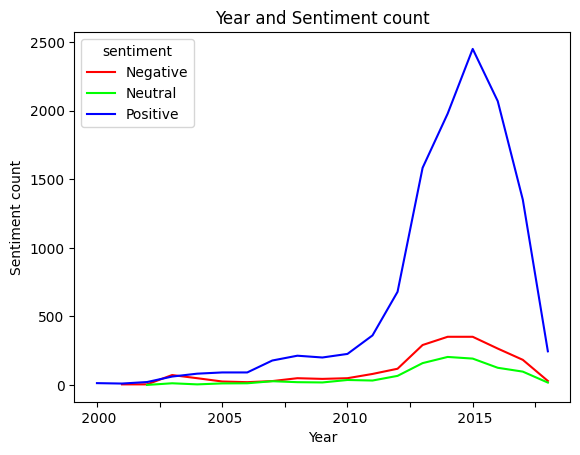

In [ ]:
#Year vs Sentiment count
df_reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(color=['#FF0000', '#00FF00', '#0000FF'], legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()


จากกราฟ พบว่า รีวิวเชิงบวกเพิ่มขึ้นตั้งแต่ปี 2010 โดยมีจุดสูงสุดประมาณปี 2013-2014 และลดลงในปี 2016

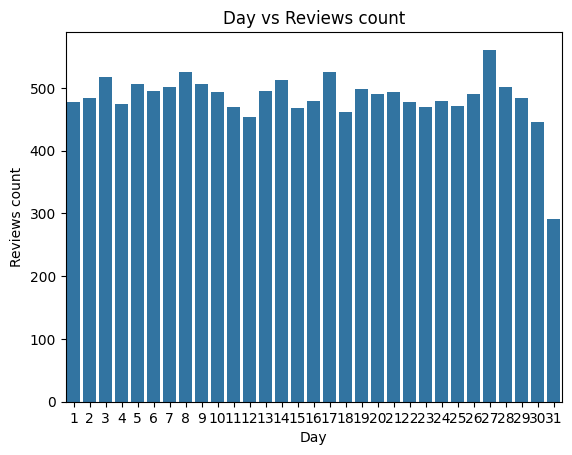

In [ ]:
#Creating a dataframe
day=pd.DataFrame(df_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

In [ ]:
pd.DataFrame(df_reviews.groupby('sentiment')['overall'].mean())

overall
sentiment          
Negative   1.336946
Neutral    3.000000
Positive   4.798842

In [ ]:
from textblob import TextBlob
df_reviews['review_len'] = df_reviews['reviews'].astype(str).apply(len)
df_reviews['word_count'] = df_reviews['reviews'].apply(lambda x: len(str(x).split()))
df_reviews.head()

reviewerID        asin  verified  overall  \
0   AXHY24HWOF184  0470536454     False        5   
1  A29OWR79AM796H  0470536454      True        4   
2   AUPWU27A7X5F6  0470536454      True        5   
3  A1N69A47D4JO6K  0470536454      True        4   
4   AHTIQUMVCGBFJ  0470536454      True        5   

                                             reviews sentiment   year month  \
0  crochet dummi karen manthey susan brittain won...  Positive   2004    08   
1                                   helpfulfour star  Positive   2017    04   
2          easi understand prompt servic toofiv star  Positive   2017    03   
3                 girlfriend use quit oftenfour star  Positive   2017    02   
4                      arriv describ happyveri happi  Positive   2017    01   

  day  review_len  word_count  
0   9        1193         189  
1   6          16           2  
2  14          41           6  
3  14          34           5  
4  29          29           4

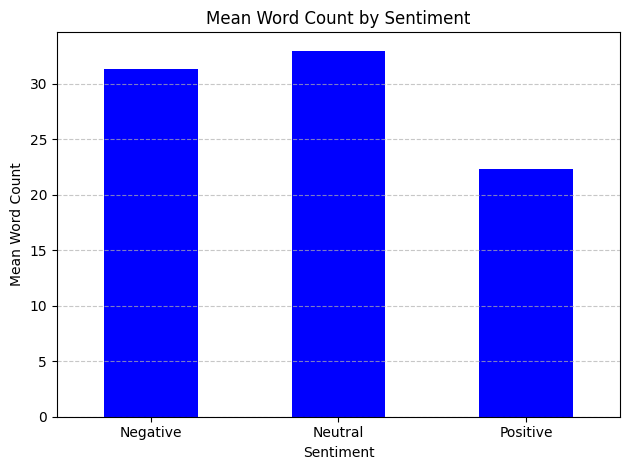

Word count mean : 24.323133333333335


In [ ]:

# Grouping the data by sentiment and calculating the mean word count
mean_word_count_by_sentiment = df_reviews.groupby('sentiment')['word_count'].mean()

# Plotting the data
mean_word_count_by_sentiment.plot(kind='bar', color='blue')
plt.title('Mean Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Mean Word Count')
plt.xticks(rotation=0)  # Rotate x-labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print('Word count mean :',df_reviews['word_count'].mean())


In [ ]:
import plotly.express as px
# Create a histogram using Plotly Express
fig = px.histogram(df_reviews, x='review_len', nbins=150,
                   labels={'review_len': 'Review Length', 'count': 'Count'},
                   title='Review Length Distribution')


fig.update_layout(xaxis_title='Review Length', yaxis_title='Count', title='Review Length Distribution',
                  bargap=0.1,  # Adjust bar spacing for better visualization
                  barmode='overlay'  # Overlap bars to create a solid orange color
                  )

# Set the bar color to orange using a dictionary
fig.update_traces(marker_color='orange')  # This line achieves the same result

# Show the plot
fig.show()

In [ ]:
import plotly.express as px

# Create a histogram using Plotly Express
fig = px.histogram(df_reviews, x='word_count', nbins=150,
                   labels={'word_count': 'Word Count', 'count': 'Count'},
                   title='Review Word Count Distribution')

fig.update_layout(xaxis_title='Word Count', yaxis_title='Count', title='Review Word Count Distribution',
                  bargap=0.1,  # Adjust bar spacing for better visualization
                  barmode='overlay'  # Overlap bars to create a solid orange color
                  )

# Set the bar color to orange using a dictionary (optional)
fig.update_traces(marker_color='orange')  # This line achieves the same result

# Show the plot
fig.show()


In [ ]:
pip install chart_studio


In [ ]:
import plotly.express as px

# Create a histogram using Plotly Express
fig = px.histogram(df_reviews, x='overall',
                      title='Review Rating Distribution',
                      color_discrete_sequence=['#b7842e'])

# Show the plot
fig.show()


พบว่า rating ส่วนใหญ่ได้ 5

กราฟแสดงคำเดี่ยวที่พบบ่อยที่สุดในรีวิว แยกตาม sentiment

In [ ]:
#Filtering data
review_pos = df_reviews[df_reviews["sentiment"]=='Positive'].dropna()
review_neu = df_reviews[df_reviews["sentiment"]=='Neutral'].dropna()
review_neg = df_reviews[df_reviews["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'Blue')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

กราฟแสดง 2 คำที่พบบ่อยที่สุดในรีวิว แยกตาม sentiment

In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'blue')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Frequent words  of Positive reviews",
                                          "Frequent words  of Neutral reviews",
                                          "Frequent words  of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

กราฟแสดงสามคำที่พบบ่อยที่สุดในรีวิว แยกตาม sentiment

In [ ]:
## Get the bar chart from positive reviews ##
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'blue')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Word Count plots of Positive reviews",
                                          "Word Countplots of Neutral reviews",
                                          "Word Count plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')


## Wordcloud

###Positive reviews

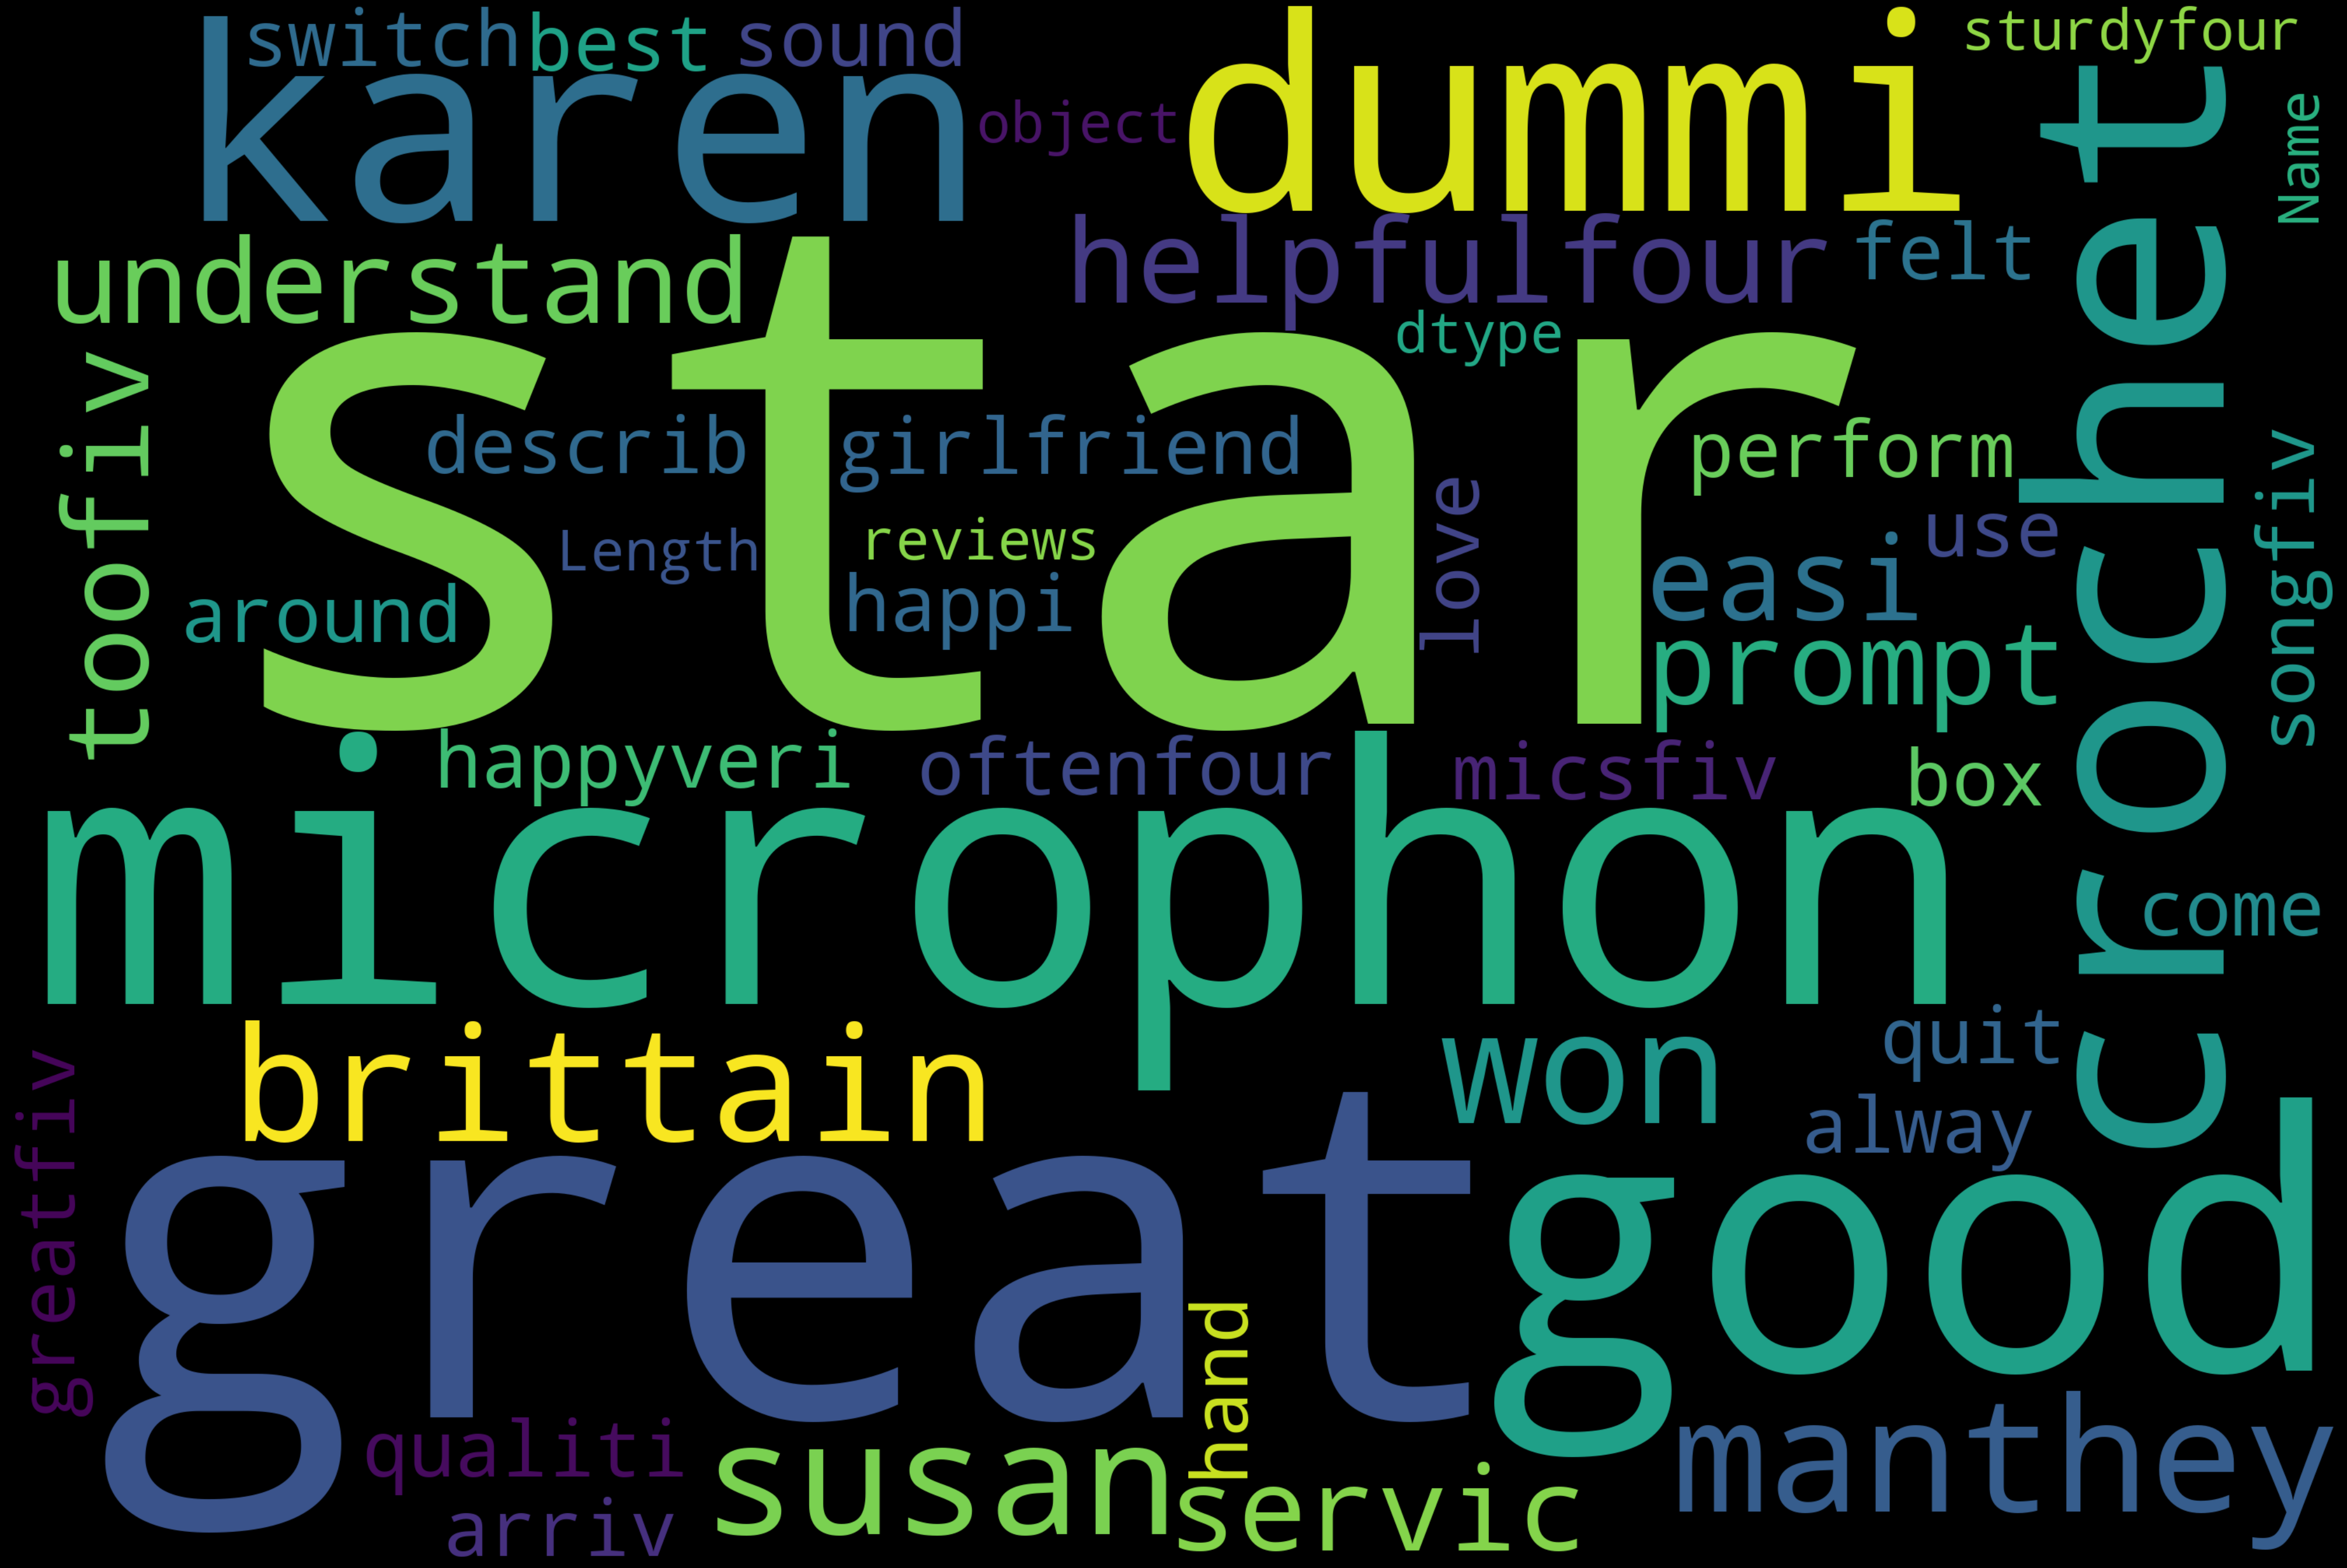

In [ ]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

###Neutral reviews

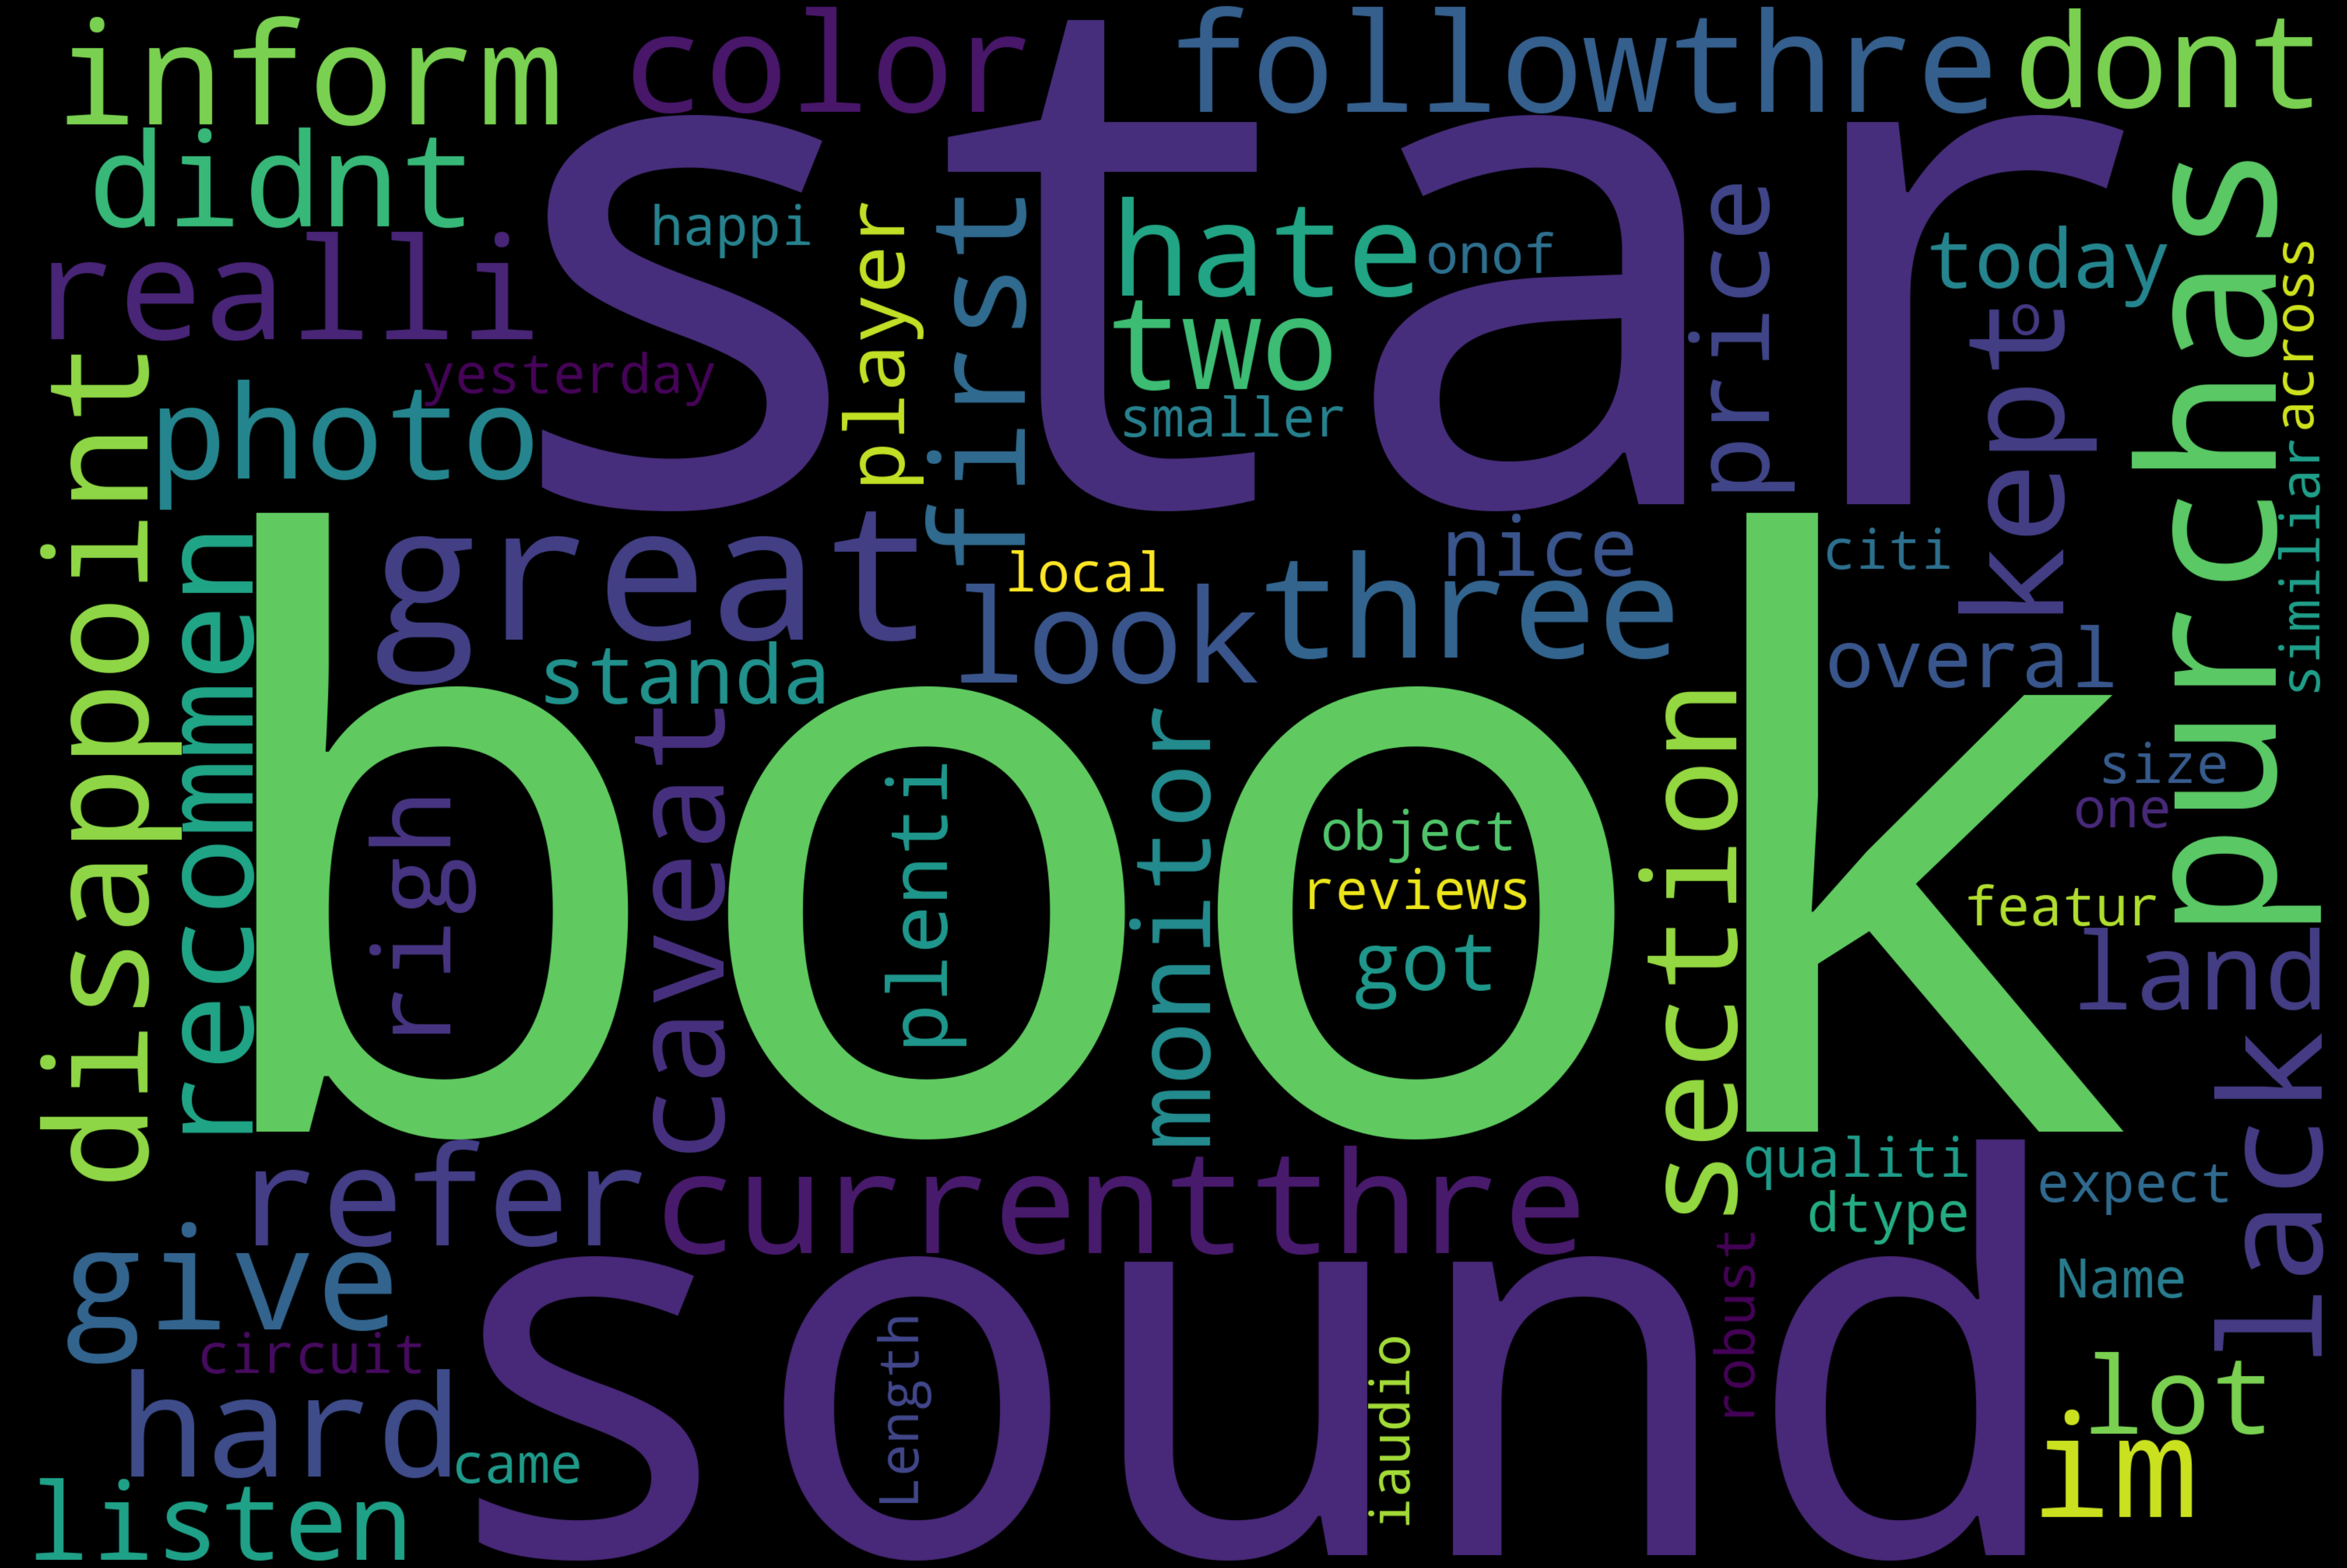

In [ ]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

###Negative reviews

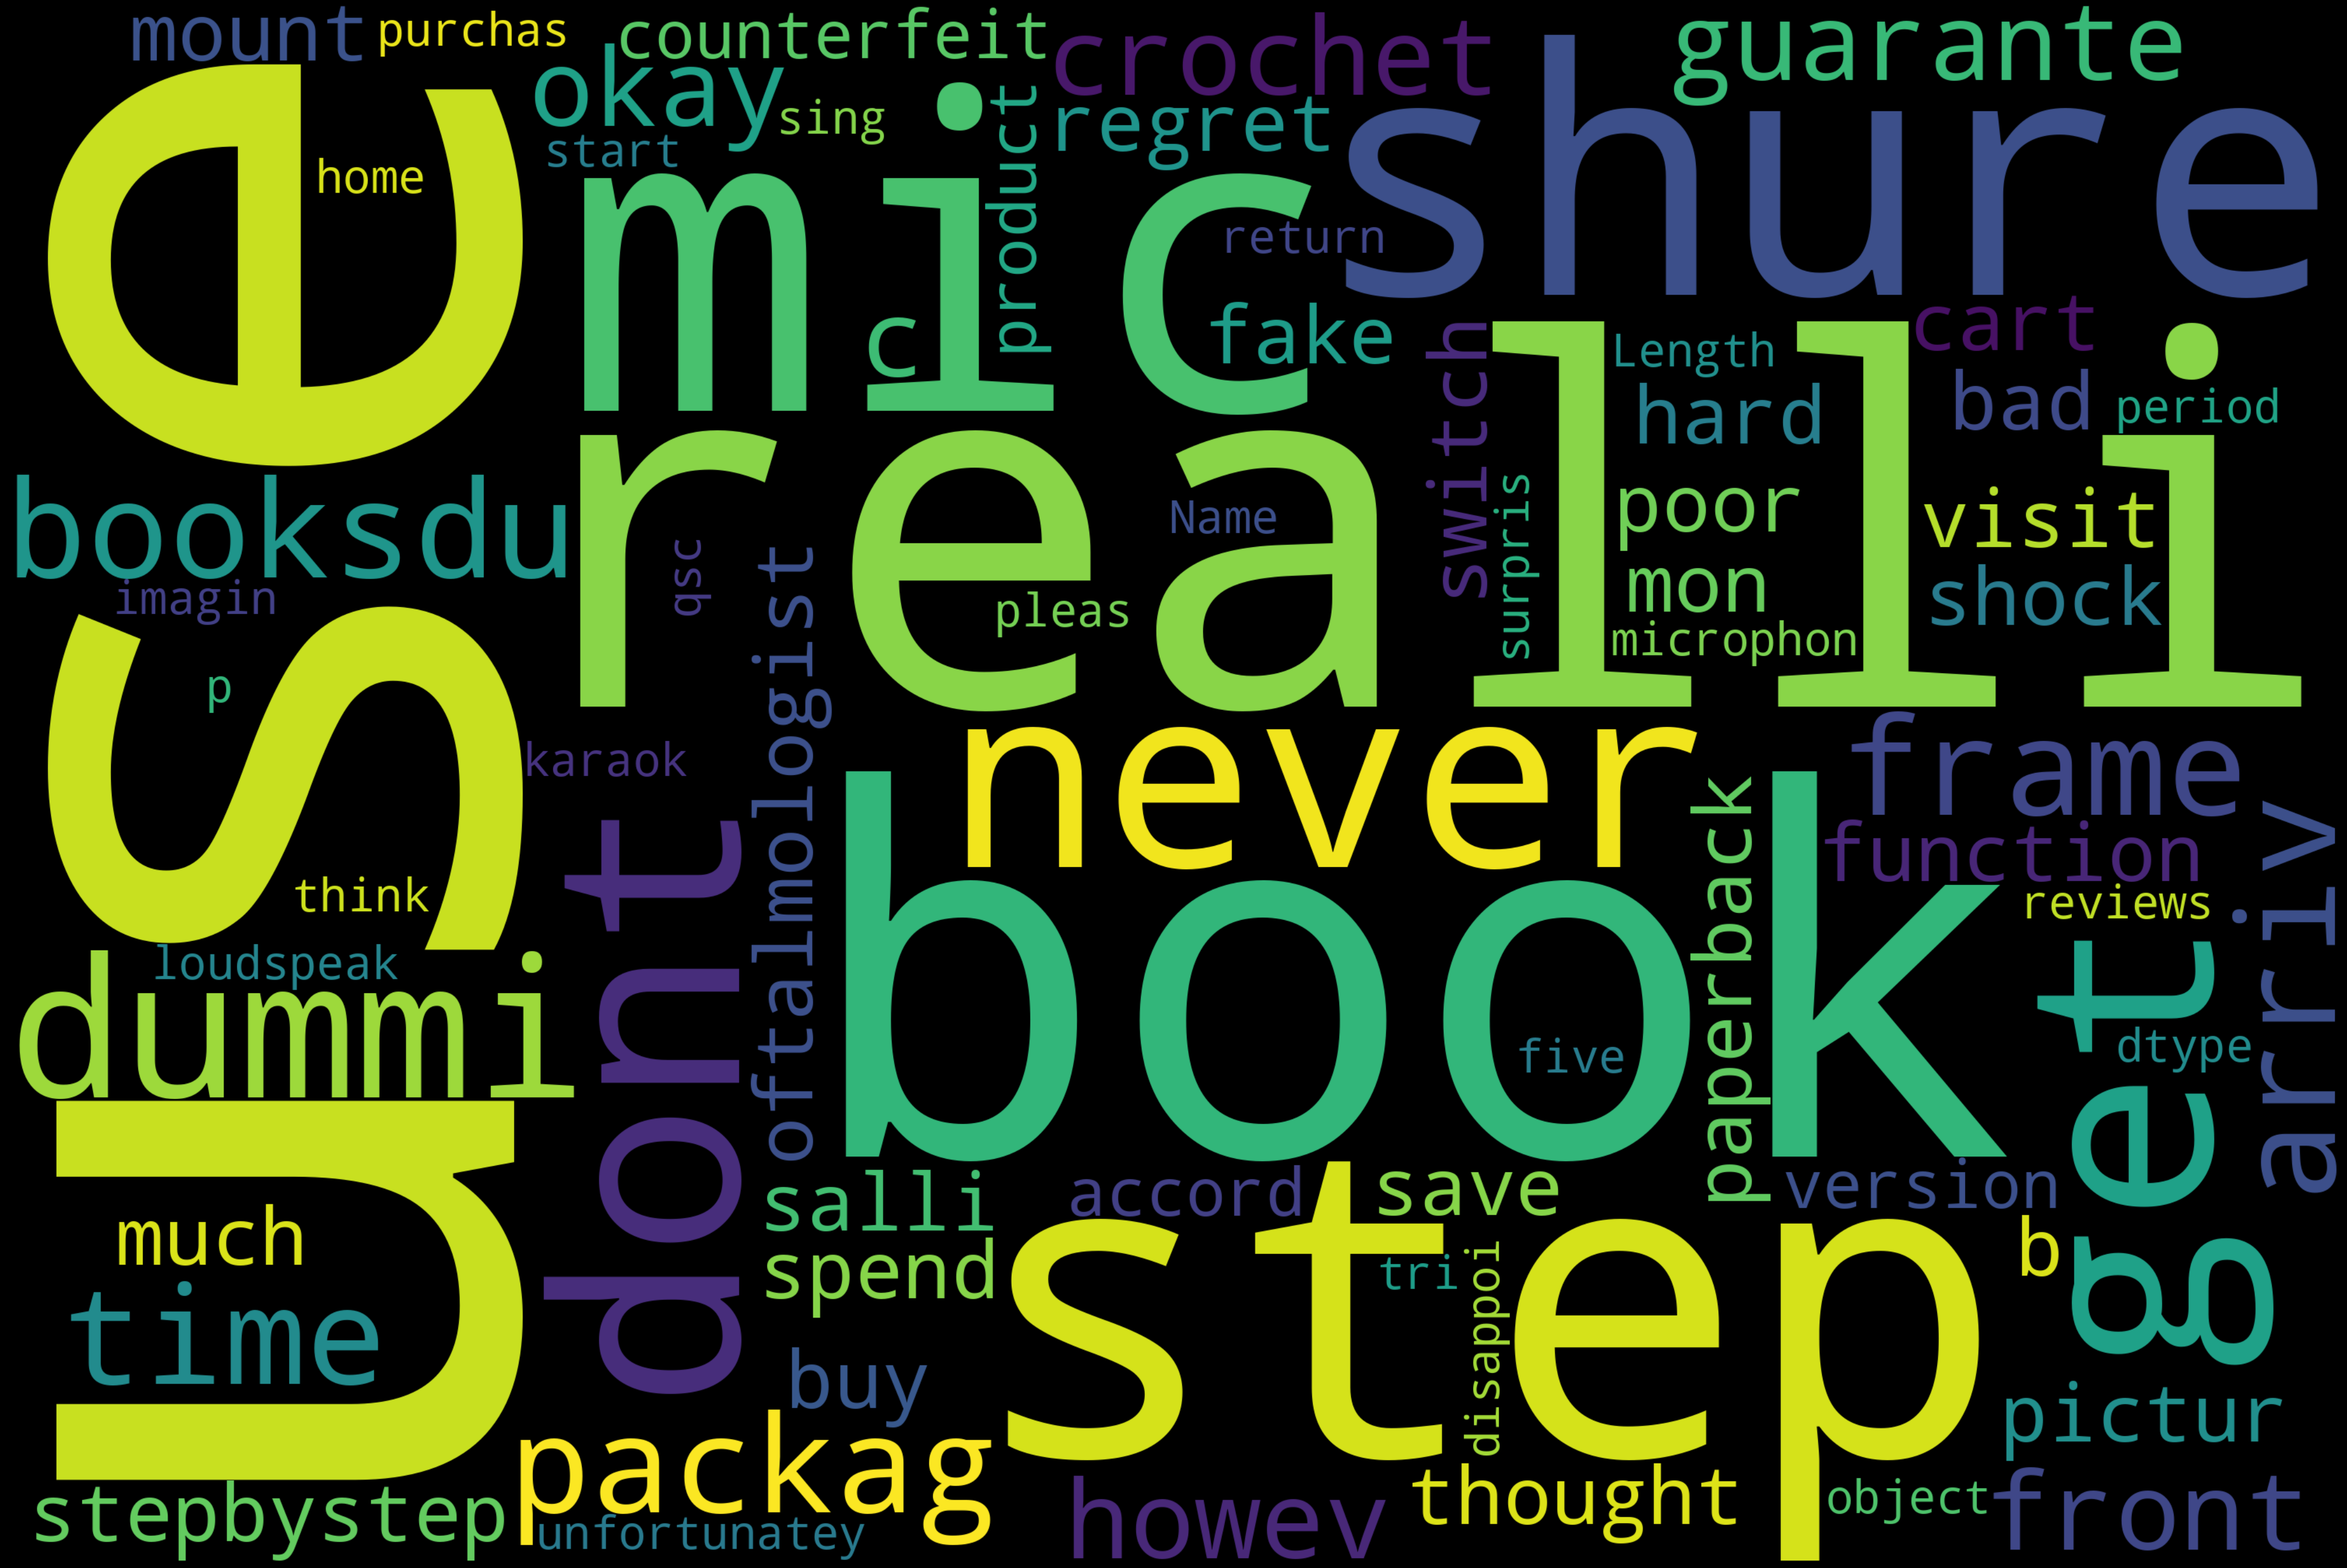

In [ ]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#  3.Model and results

##Encoding target variable-sentiment

In [ ]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'sentiment'.
df_reviews['sentiment']= label_encoder.fit_transform(df_reviews["sentiment"])

df_reviews['sentiment'].unique()

array([2, 1, 0])

In [ ]:
df_reviews['sentiment'].value_counts()

sentiment
2    11921
0     2030
1     1049
Name: count, dtype: int64

##Extracting 'reviews' for processing

แยกข้อมูลจากคอลัมน์ reviews  เพื่อนำไปประมวลผลด้วยเทคนิค Sentiment Analysis

In [ ]:
#Extracting 'reviews' for processing
review_features=df_reviews.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()

reviews
0  crochet dummi karen manthey susan brittain won...
1                                   helpfulfour star
2          easi understand prompt servic toofiv star
3                 girlfriend use quit oftenfour star
4                      arriv describ happyveri happi

In [ ]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[3]

'girlfriend use quit oftenfour star'

##TFIDF

แปลงคำใน reviews เป็นเลข 1 และ 0 ในการเข้ารหัส โดยใช้ TFIDF
ซึ่งมา 5,000 คำ

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [ ]:
X.shape

(15000, 5000)

In [ ]:
#Getting the target variable(encoded)
y=df_reviews['sentiment']

การจัดการ target feature ที่ไม่สมดุล ด้วย SMOTE
เพื่อให้ข้อมูลที่สุ่มตัวอย่างใหม่มีการกระจายคลาสเท่าๆ กัน

In [ ]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 11921, 0: 2030, 1: 1049})
Resampled dataset shape Counter({2: 11921, 1: 11921, 0: 11921})


##Model Building: Sentiment Analysis

In [ ]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##Model selection

ทำการเลือกโมเดลที่มีประสิทธิภาพดีที่สุด

In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8225999999999999
Decision Tree Test Accuracy: 0.7593333333333334
KNN Test Accuracy: 0.7481333333333333
SVC Test Accuracy: 0.8188000000000001


จากค่า Accuracy ในแต่ละโมเดลจะพบว่า Model Logistic Regression มีความแม่นยำมากที่สุดในการทำนาย sentiment ของ reviews จึงเลือก Model Logistic Regression มาทำการ Hyperparameter tuning เพื่อให้โมเดลมีประสิทธิภาพที่ดีขึ้น

Logistic Regression Model : Hyperparameter tuning

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=4714.8663634573895, random_state=0)
The mean accuracy of the model is: 0.8654512918018119


In [ ]:
logreg = LogisticRegression(C=4714.8663634573895, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


plot the confusion matrix with ROC and check  f1 score

Confusion matrix, without normalization


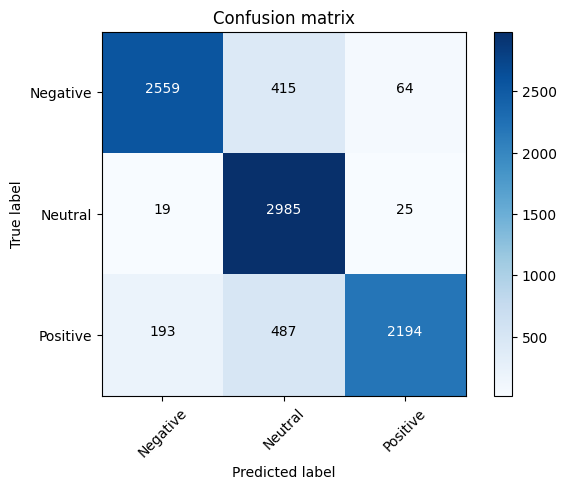

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      3038
           1       0.77      0.99      0.86      3029
           2       0.96      0.76      0.85      2874

    accuracy                           0.87      8941
   macro avg       0.88      0.86      0.87      8941
weighted avg       0.88      0.87      0.87      8941



พบว่าการทำนาย reviews ทั้งเชิงบวก เป็นกลาง และเชิงลบ ได้คะแนน f1-score ค่อนข้างสูงในทุกคลาส แสดงว่ามีประสิทธิภาพที่ค่อนข้างดีในการทำนาย

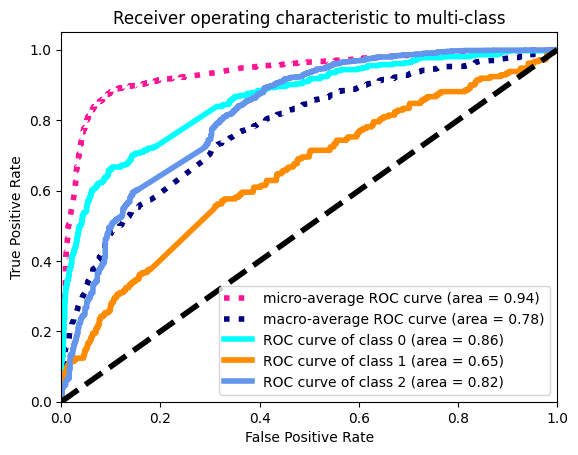

In [ ]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

ทำการ plot ROC ของคลาสต่างๆ เพื่อช่วยให้เห็นว่าคลาสใดถูกจัดประเภทได้ดีกว่า ซึ่งพบว่า class 0 = เป็นกลางถูกจัดประเภทได้ดีที่สุด รองลงมาคือ class 2 = เชิงบวก และ class 1 = เชิงลบ ตามลำดับ


# 4.Summary and discussion

โปรเจคนี้วิเคราะห์ความรู้สึกจากรีวิวของลูกค้าเกี่ยวกับเครื่องดนตรีบน Amazon(ข้อมูลปี 2018)

โดยมีเป้าหมาย คือ วิเคราะห์ความรู้สึกของลูกค้าที่มีต่อการซื้อเครื่องดนตรีบน Amazon จากข้อความ Reviews และเพื่อเข้าใจความพึงพอใจโดยรวมของลูกค้าที่มีต่อเครื่องดนตรี รวมทั้งสามารถค้นพบข้อความแสดงความคิดเห็นจากลูกค้าเกิดขึ้นซ้ำจากการวิจารณ์เชิงบวกและเชิงลบ

**มีขั้นตอนต่อไปนี้: **
มีขั้นตอนและดังต่อไปนี้
1. จัดหมวดหมู่คลาสทั้งหมด โดยเริ่มตั้งแต่การแยกความรู้สึกตามคะแนนโดยรวม ทำความสะอาดข้อความ และทำการลบ Stop words ใน reviews
2. ใช้ n-gram ในการวิเคราะห์ความรู้สึก เนื่องจากคำหนึ่งคำไม่สามารถให้ผลลัพธ์ที่เหมาะสมได้ พบว่า reviews ส่วนใหญ่ในชุดข้อมูลนี้เกี่ยวกับเครื่องดนตรีที่เป็นเครื่องสาย เช่น กีตาร์
3. จัดการกับความไม่สมดุลของจำนวนข้อมูลในแต่ละคลาสด้วย smote
4. สร้างโมเดลทำนายความรู้สึกของลูกค้าด้วย Machine Learning

ผลการวิเคราะห์ พบว่า
1. reviews ส่วนใหญ่ในชุดข้อมูลนี้พูดเกี่ยวกับเครื่องดนตรีที่เป็นเครื่องสาย เช่น กีตาร์
2. reviews ส่วนใหญ่นั้นเป็น reviews ที่เป็นกลาง ซึ่งถือเป็นการวิจารณ์ผลิตภัณฑ์ส่วนใหญ่จากผู้ซื้อจริง ๆ 
3. ในการวิเคราะห์ความรู้สึก พิจาณาที่คะแนน f1-score ซึ่งได้เฉลี่ย 87% ดังนั้นโมเดลนี้จึงทำนายได้ค่อนข้างแม่นยำ

ข้อจำกัดของโปรเจคนี้ คือปัญหาในการดาวน์โหลดข้อมูลขนาดใหญ่เพื่อมาใช้ในการวิเคราะห์เนื่องจากใช้เวลานาน จึงทำการเลือกข้อมูลมาจำนวน 15000 row ซึ่งเป็นส่วนนึงของข้อมูลทั้งหมดเท่านั้น

Future Work


1.   ศึกษาการใชัโมเดลอื่นๆ เช่น Recurrent Neural Networks มาใช้ในการวิเคราะห์ความรู้สึกของลูกค้า
2.   เพิ่มขนาดข้อมูลในการนำมาวิเคราะห์ เพื่อให้การวิเคราะห์นั้นครอบคลุมมากยิ่งขึ้น

